In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import argrelmax, argrelmin, find_peaks


In [24]:


def find_maximum(data_slice, significant_key):
    return data_slice.loc[data_slice[significant_key] == data_slice[significant_key].max()]


def find_minimum(data_slice, significant_key):
    return data_slice.loc[data_slice[significant_key] == data_slice[significant_key].min()]


def get_slice_in_key_range(data, key, min, max):
    return data.loc[data[key] > min].loc[data[key] < max]


def generate_linefit_y(x, fit):
    y = [0 for i in range(len(x))]

    deg = len(fit) - 1
    for c in fit:
        y += c*x**(deg)
        deg -= 1
    return y


def find_x_where_y_equals(y_value, a, b):
    # y = a*x + b
    # x = (y - b)/a
    return (y_value - b)/a

def find_point_of_intersection(a1,b1,a2,b2):
    x = (b2 - b1)/(a1-a2)
    y = a1*x + b1
    return x, y

def find_closest_entry(df, key, value):
    return df.iloc[(df[key]-value).abs().argsort()[:1]]

# constants
_s = 10
_linewidth = 1



In [9]:

df = pd.read_csv('in/zad1_dta_4.txt', sep='\s+', names=['T', 'C'], decimal=',')
df


,T,C
0,40.07,-0.9957
1,40.15,-0.9965
2,40.22,-0.9972
3,40.30,-0.9980
4,40.37,-0.9989
...,...,...
7723,617.51,-9.8372
7724,617.59,-9.8404
7725,617.67,-9.8432
7726,617.74,-9.8461


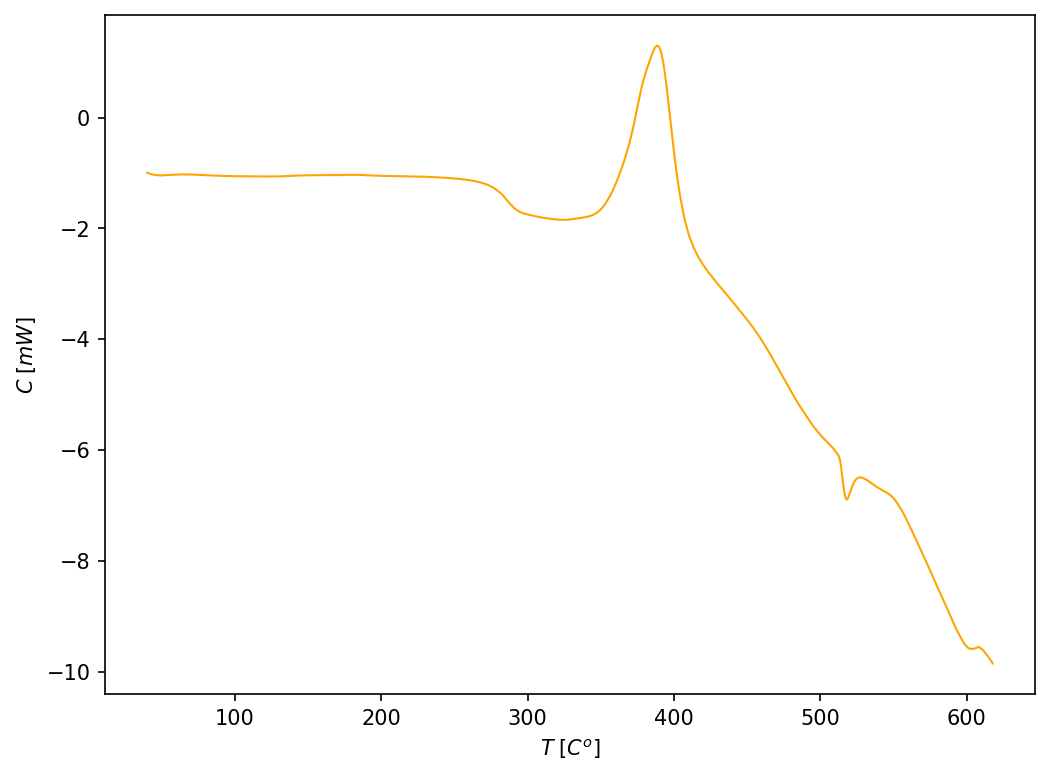

In [10]:
plt.figure(figsize=(8, 6), dpi=150)

_linewidth = 1
_color = 'orange'
plt.plot(df['T'], df['C'], linewidth=_linewidth, color=_color)

plt.xlabel(r'$T \; [C^o]$')
plt.ylabel(r'$C \; [mW]$')

plt.savefig('out/zad3_wyk_V_od_d.jpg', dpi = 350)
plt.show()


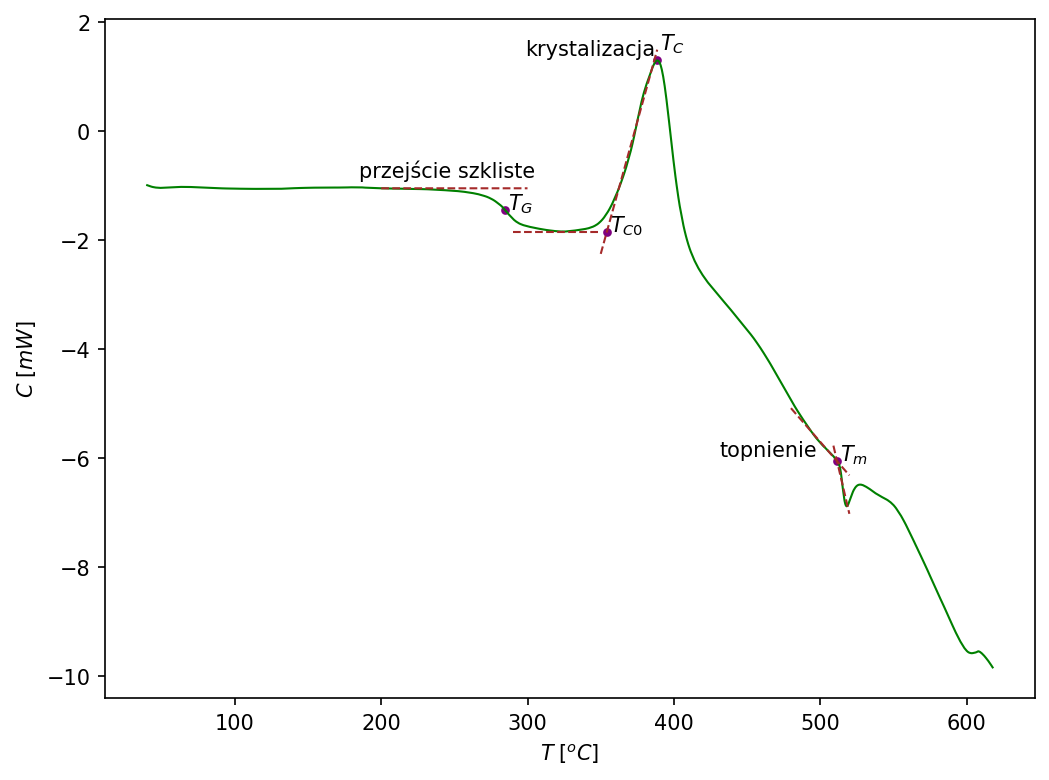

In [29]:

plt.figure(figsize=(8, 6), dpi=150)

_linewidth = 1
_color = 'green'
plt.plot(df['T'], df['C'], linewidth=_linewidth, color=_color)

# find the local minimum
slice_of_interest = get_slice_in_key_range(df, 'T', 290, 350)
T_c_horizontal_line_height = find_minimum(slice_of_interest, 'C')['C'].min()
T_c_horizontal_line = pd.DataFrame({
    'T':  slice_of_interest['T'].copy(),
    'C': [T_c_horizontal_line_height for i in range(len(slice_of_interest['T']))],
})

#plot minimum line
_color = 'brown'
_linestyle = '--'
plt.plot(T_c_horizontal_line['T'], T_c_horizontal_line['C'],
         linewidth=1, color=_color, linestyle=_linestyle)

# find the peak and parametrize diagonal line along the rising curve
peak = find_maximum(df, 'C')
T_C = peak['T'].min()
slice_of_interest = get_slice_in_key_range(df, 'T', 370, peak['T'].min())
T_c_diagonal_linefit = np.polyfit(
    slice_of_interest['T'], slice_of_interest['C'], 1)
T_c_diagonal_line = pd.DataFrame({
    'T':  np.arange(350, peak['T'].min(), 0.1),
})
T_c_diagonal_line['C'] = generate_linefit_y(
    T_c_diagonal_line['T'], T_c_diagonal_linefit)

#plot diagonal line
_color = 'brown'
_linestyle = '--'
plt.plot(T_c_diagonal_line['T'], T_c_diagonal_line['C'],
         linewidth=1, color=_color, linestyle=_linestyle)

# find where the lines interseft each other
T_C0 = find_x_where_y_equals(
    T_c_horizontal_line_height, T_c_diagonal_linefit[0], T_c_diagonal_linefit[1])

#find horizontal line on first peak
slice_of_interest = get_slice_in_key_range(df, 'T', 200, 300)
first_peak = find_maximum(slice_of_interest, 'C')
first_peak_horizontal_line_height = find_maximum(slice_of_interest, 'C')['C'].min()
first_peak_horizontal_line = pd.DataFrame({
    'T':  slice_of_interest['T'].copy(),
    'C': [first_peak_horizontal_line_height for i in range(len(slice_of_interest['T']))],
})
_color = 'brown'
_linestyle = '--'
plt.plot(first_peak_horizontal_line['T'], first_peak_horizontal_line['C'],
         linewidth=1, color=_color, linestyle=_linestyle)



C_G = (first_peak_horizontal_line_height + T_c_horizontal_line_height)/2
T_G = find_closest_entry(df, 'C', C_G)['T'].min()

# find the peak and parametrize diagonal line along the rising curve
slice_of_interest = get_slice_in_key_range(df, 'T', 490, 510)
T_m_diagonal_1_fit = np.polyfit(
    slice_of_interest['T'], slice_of_interest['C'], 1)
T_m_diagonal_1 = pd.DataFrame({
    'T':  np.arange(480, 520, 0.1),
})
T_m_diagonal_1['C'] = generate_linefit_y(
    T_m_diagonal_1['T'], T_m_diagonal_1_fit)

#plot diagonal line
_color = 'brown'
_linestyle = '--'
plt.plot(T_m_diagonal_1['T'], T_m_diagonal_1['C'],
         linewidth=1, color=_color, linestyle=_linestyle)

# find the peak and parametrize diagonal line along the rising curve
slice_of_interest = get_slice_in_key_range(df, 'T', 510, 520)
T_m_diagonal_2_fit = np.polyfit(
    slice_of_interest['T'], slice_of_interest['C'], 1)
T_m_diagonal_2 = pd.DataFrame({
    'T':  np.arange(509, 520, 0.1),
})
T_m_diagonal_2['C'] = generate_linefit_y(
    T_m_diagonal_2['T'], T_m_diagonal_2_fit)

#plot diagonal line
_color = 'brown'
_linestyle = '--'
plt.plot(T_m_diagonal_2['T'], T_m_diagonal_2['C'],
         linewidth=1, color=_color, linestyle=_linestyle)

#plot T_C0
_color = 'purple'
plt.scatter(T_C0, T_c_horizontal_line_height, s=_s, color=_color)
plt.text(T_C0 + 2, T_c_horizontal_line_height + 0.01, r'$T_{C0}$')

#plot T_C
_color = 'purple'
plt.scatter(T_C, peak['C'].max(), s=_s, color=_color)
plt.text(T_C + 2, T_c_diagonal_line['C'].max() + 0.01, r'$T_{C}$')
plt.text(T_C -90, T_c_diagonal_line['C'].max() - 0.1, 'krystalizacja')

#plot T_G
_color = 'purple'
plt.scatter(T_G, C_G, s=_s, color=_color)
plt.text(T_G + 2, C_G + 0.01, r'$T_{G}$')
plt.text(T_G - 100, C_G + 0.6, 'przejście szkliste')

T_m, C_m = find_point_of_intersection(T_m_diagonal_1_fit[0], T_m_diagonal_1_fit[1], T_m_diagonal_2_fit[0], T_m_diagonal_2_fit[1])
#plot T_G
_color = 'purple'
plt.scatter(T_m, C_m, s=_s, color=_color)
plt.text(T_m + 2, C_m + 0.01, r'$T_{m}$')
plt.text(T_m - 80, C_m + 0.1, 'topnienie')



plt.xlabel(r'$T \; [^oC]$')
plt.ylabel(r'$C \; [mW]$')

plt.savefig('out/zad3_wyk_V_od_d_pkt_charakterystyczne.jpg', dpi = 350)
plt.show()
